In [2]:
import numpy as np

from castle.datasets import DAG, IIDSimulation 

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

# Generating syntehtic data with gCastle

A part of [CausalPython](https://causalpython.io) series on causality.

<a href="https://causalpython.io"><img src="img/CausalPython.io__flat.png" width=150 align="left"></a>
<br>

In [9]:
# Set random seed
SEED = 18
np.random.seed(SEED)

## Data

In [26]:
# Generate a scale-free adjacency matrix
adj_matrix = DAG.scale_free(
    n_nodes=9,
    n_edges=17,
    seed=SEED
)

# Generate the data
dataset = IIDSimulation(
    W=adj_matrix, 
    n=10000, 
    method='linear', 
    sem_type='exp' # Exponential noise
)

2023-04-07 11:11:47,867 - C:\Users\aleks\anaconda3\envs\causal_book_py38\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


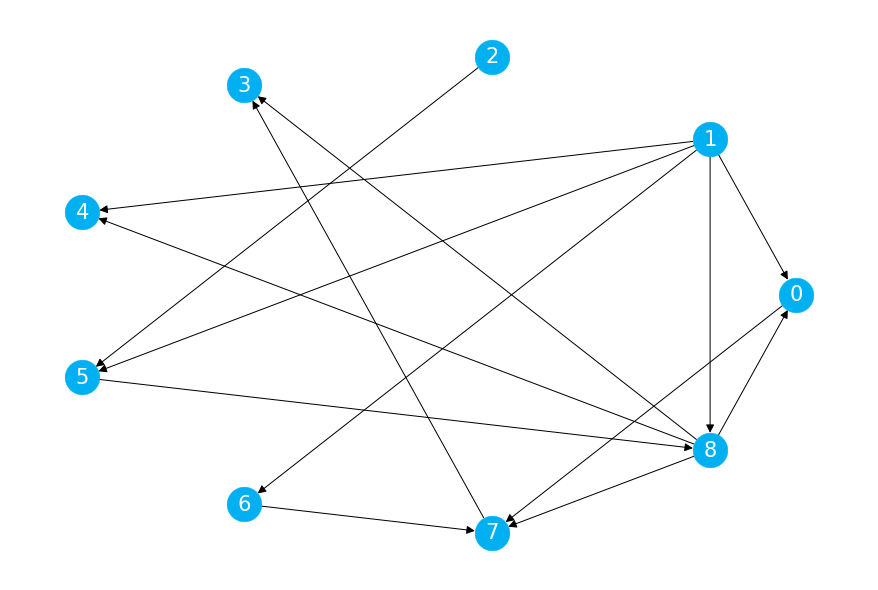

In [27]:
# Visualize the adjacency matrix
g = nx.DiGraph(adj_matrix)

plt.figure(figsize=(12, 8))
nx.draw(
    G=g,
    node_color=COLORS[0],
    node_size=1200,
    arrowsize=17,
    with_labels=True,
    font_color='white',
    font_size=21,
    pos=nx.circular_layout(g)
)

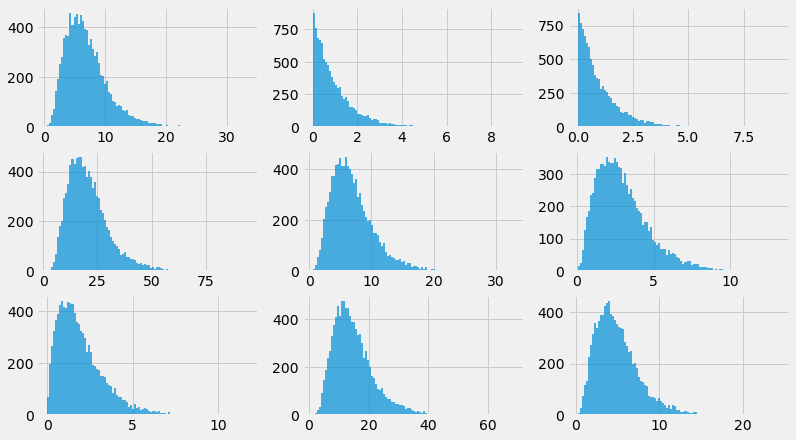

In [28]:
# Plot variables distributions
plt.figure(figsize=(12, 7))
for i in range(dataset.X.shape[1]):
    plt.subplot(3, 3, i + 1)
    plt.hist(dataset.X[:, i], bins=100, alpha=.7)